Last check to confirm that the model is good. 

In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import GoH.verify_model
from matplotlib import pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sklearn.metrics

In [3]:
%matplotlib inline 
dataDir = "../../data/"

## Target Model

In [4]:
target_params = GoH.verify_model.extract_params(os.path.join(dataDir, 'target_300_10.18497.state.gz'))

In [5]:
target_df = GoH.verify_model.state_to_df(os.path.join(dataDir, 'target_300_10.18497.state.gz'))

In [6]:
alpha = sum([float(x) for x in target_params[0][1:]])
alpha

4.695902637960019

In [7]:
target_df[:10]

,#doc,source,pos,typeindex,type,topic
0,0,NaN,0,0,uncommon,165
1,0,NaN,1,1,thing,224
2,0,NaN,2,2,member,224
3,0,NaN,3,3,boarding,136
4,0,NaN,4,4,school,14
5,0,NaN,5,5,form,237
6,0,NaN,6,6,clique,94
7,0,NaN,7,7,pair,11
8,0,NaN,8,8,tend,136
9,0,NaN,9,9,thank,224


In [20]:
target_docKeys = pd.read_table(os.path.join(dataDir, 'target_300_10_Sample.txt'), header=None).reset_index()

In [22]:
target_keys = target_docKeys[['index', 0]]

In [30]:
agg_df = GoH.verify_model.aggregate_data(target_df, '#doc', 'topic')

In [31]:
agg_df[:10]

,#doc,topic,count
0,0,11,10
1,0,14,7
2,0,94,14
3,0,102,2
4,0,113,23
5,0,136,12
6,0,144,1
7,0,165,1
8,0,171,12
9,0,175,1


In [ ]:
target_matrix = GoH.verify_model.pivot_and_smooth(agg_df, alpha, 'topic', '#doc')

In [ ]:
target_matrix

## First test: Random

First find overlap list

In [24]:
random_docKeys = pd.read_table(os.path.join(dataDir, 'randomSample.txt'), header=None).reset_index()

In [25]:
random_keys = random_docKeys[['index', 0]]

In [28]:
random_overlap = pd.merge(target_keys, random_keys, how="inner", on=[0])

In [29]:
random_overlap

,index_x,0,index_y
0,4,ADV18981201-V02-01-page20.txt,2
1,8,ADV18990101-V01-01-page45.txt,17
2,9,ADV18990201-V01-02-page54.txt,42
3,10,ADV18990301-V01-03-page41.txt,61
4,11,ADV18990301-V01-03-page60.txt,69
5,12,ADV18990301-V01-03-page61.txt,70
6,13,ADV18990501-V01-05-page47.txt,118
7,16,ADV18990601-V01-06-page110.txt,130
8,17,ADV18990601-V01-06-page111.txt,131
9,18,ADV18990601-V01-06-page114.txt,133


In [32]:
target_filtered = agg_df[agg_df['#doc'].isin(random_overlap['index_x'])]

In [33]:
random_params = GoH.verify_model.extract_params(os.path.join(dataDir, 'random.16195.state.gz' ))

In [34]:
random_df = GoH.verify_model.state_to_df(os.path.join(dataDir, 'random.16195.state.gz'))

In [35]:
random_alpha = sum([float(x) for x in target_params[0][1:]])
random_alpha

4.695902637960019

In [36]:
random_df[:10]

,#doc,source,pos,typeindex,type,topic
0,0,NaN,0,0,draining,3
1,0,NaN,1,1,advocate,45
2,0,NaN,2,2,december,233
3,0,NaN,3,3,heavenly,233
4,0,NaN,4,4,visitor,94
5,0,NaN,5,5,waiting,3
6,0,NaN,6,6,lord,233
7,0,NaN,7,7,good,25
8,0,NaN,8,8,cause,50
9,0,NaN,9,9,holy,146


In [37]:
random_agg = GoH.verify_model.aggregate_data(random_df, '#doc', 'topic')
random_agg[:10]

,#doc,topic,count
0,0,3,10
1,0,7,4
2,0,20,1
3,0,25,7
4,0,45,12
5,0,50,1
6,0,55,5
7,0,71,1
8,0,77,3
9,0,94,4


In [38]:
random_filtered = random_agg[random_agg['#doc'].isin(random_overlap['index_y'])]

In [39]:
target_matrix = GoH.verify_model.pivot_and_smooth(target_filtered, alpha, '#doc', 'topic')

In [40]:
random_matrix = GoH.verify_model.pivot_and_smooth(random_agg, random_alpha, '#doc', 'topic')

In [43]:
pairs = {}
for i in range(250):
    topic = target_matrix[i]
    corrs = random_matrix.corrwith(topic)
    pairs[i] = corrs

In [49]:
corr2 = target_matrix.corrwith(random_matrix, axis=1)

In [50]:
corr2

0       -0.005597
1        0.069766
2       -0.066850
3       -0.039138
4        0.014002
5       -0.004824
6        0.007886
7       -0.009563
8       -0.028319
9        0.002268
10       0.001710
11      -0.006399
12      -0.010597
13       0.026086
14      -0.013465
15      -0.046411
16      -0.032750
17      -0.021451
18       0.004391
19      -0.032864
20      -0.005694
21      -0.024709
22      -0.042227
23       0.073774
24      -0.037743
25       0.001679
26       0.098474
27      -0.032690
28       0.032123
29      -0.029267
           ...   
78951         NaN
78952         NaN
78953         NaN
78954         NaN
78955         NaN
78956         NaN
78957         NaN
78958         NaN
78959         NaN
78960         NaN
78961         NaN
78962         NaN
78963         NaN
78964         NaN
78965         NaN
78966         NaN
78967         NaN
78968         NaN
78969         NaN
78970         NaN
78971         NaN
78972         NaN
78973         NaN
78974         NaN
78975     

In [44]:
corr_frame = pd.DataFrame.from_dict(pairs, orient='index')
corr_frame

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.008129,-0.007851,0.015347,0.006413,0.003347,0.024763,0.003062,0.010400,-0.003262,-0.003364,...,0.008955,0.004432,0.000693,-0.000898,-0.007223,0.022508,-0.004143,0.018480,0.005240,0.000304
1,-0.002484,-0.008427,-0.010804,-0.011093,-0.002527,-0.012868,-0.009992,-0.008413,0.004304,0.011561,...,-0.010881,-0.006963,-0.010392,0.006032,-0.001906,-0.003953,-0.003263,-0.014115,-0.005687,0.002366
2,-0.012072,-0.021336,-0.018651,0.011326,0.047756,-0.020740,0.003364,0.026631,-0.004377,-0.012439,...,-0.012199,-0.008488,-0.023281,-0.000836,0.034771,-0.003932,-0.009413,0.016821,-0.000331,0.003352
3,0.000783,0.000567,0.009175,0.006973,0.003979,-0.026217,0.004108,-0.002303,-0.000257,-0.010734,...,0.015342,0.006756,-0.002678,-0.005204,0.006683,-0.004311,-0.005777,0.006099,0.005750,0.005223
4,0.023979,-0.005155,0.001610,0.007286,0.002530,-0.008133,0.008138,0.013789,-0.007096,-0.005932,...,0.036055,0.013008,-0.012880,-0.002707,0.012079,-0.003279,-0.003541,0.021738,0.008970,0.003789
5,0.014511,0.001322,-0.002449,0.010423,0.006507,0.037486,0.014309,0.018194,-0.008297,-0.019161,...,0.021278,-0.002222,0.004652,-0.004215,0.012800,0.000920,-0.001096,0.008029,0.004128,0.001859
6,0.009987,0.000132,0.015771,0.004998,0.000490,-0.003877,0.002907,0.014028,-0.002611,-0.013149,...,0.001363,0.003920,0.006165,0.000689,0.002018,0.012128,0.018065,0.013971,0.001937,0.007868
7,0.031573,-0.016373,-0.008979,0.002119,0.005112,-0.025584,0.012628,0.009279,-0.011412,-0.008886,...,0.089897,0.007780,-0.015136,-0.005493,0.014765,-0.004400,-0.007376,0.024530,0.014723,-0.001552
8,0.007123,-0.007128,-0.000942,0.011555,0.012701,-0.008514,0.005312,0.003486,-0.002945,-0.005649,...,0.021690,0.001534,-0.000372,0.001859,0.003027,0.011508,-0.002597,0.015692,0.001761,0.005640
9,0.098175,-0.008891,-0.001544,0.002544,-0.015007,-0.010873,-0.009938,-0.009213,-0.000621,-0.014387,...,0.087931,0.033731,0.004654,0.002395,-0.010103,-0.000982,-0.000839,0.019701,0.032314,0.009460


In [45]:
import numpy as np
import seaborn as sns

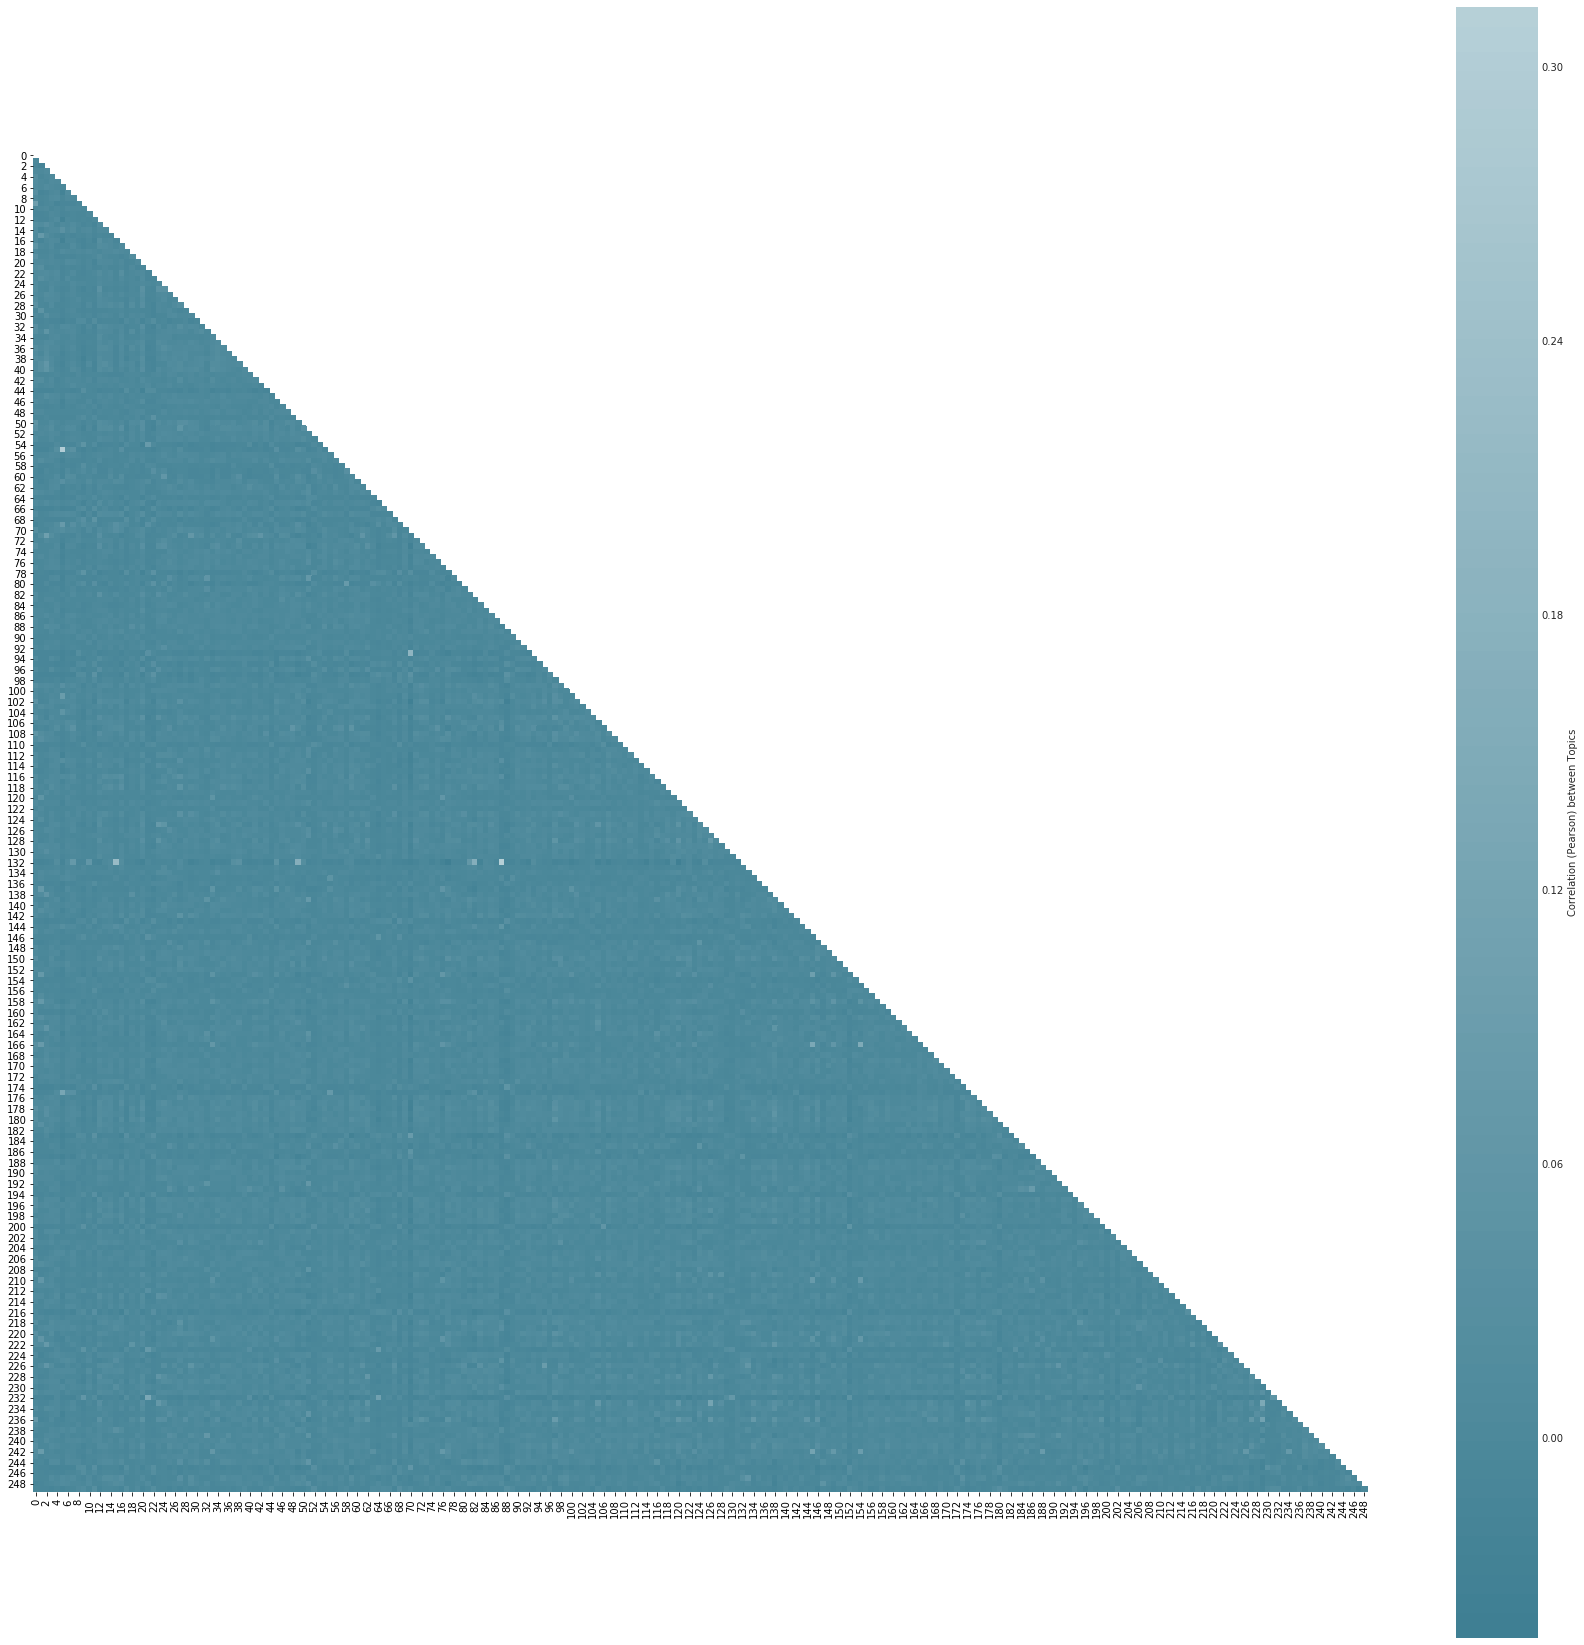

In [46]:
f, ax = plt.subplots(figsize=(30,30))
mask = np.zeros_like(corr_frame)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_frame,
                center = 0.5,
                mask = mask, 
                cmap = sns.diverging_palette(220, 10, as_cmap=True),
                square = True,
                xticklabels = 2,
                cbar_kws={"label":"Correlation (Pearson) between Topics"},
                ax = ax)